Given a data case with 20 car insurance companies values. I had to explain the total ganancies of them during one year.

The variables
- Monaten= Month
- Total Einzahlungen = Total deposits 
- Total Schäden= Total Damages costs
- Total Single Damage Number 
- Monaten Differenzen= Diffence between damages and depositis by mothts

- Have the entrepreneurs had more in damage than in deposit?
- Can certain effects be predicted?
- Does the number of damages have something to do with the damage behavior.

Tip, the claims ratio is an important value (claims per month/deposit per month) over 100% bad.

Below is a list of individual claims per month.

An entrepreneur pays per vehicle 194€ insurance per month.



# Importing packages

In [1]:
# Basic preprocessing packages
import numpy as np
import pandas as pd

# Visualization packages

import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Packages for Linear regression
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


# Import Excel file

In [2]:
df = pd.read_excel (r'EPEÑA-Data Case.xlsx',sheet_name='Total Montlich', header=3)
df

,Unnamed: 0,Total Einzahlungen,Total Schäden,Total Single Damage Number,Monaten Differenzen
0,April,44929.670000,35486.16,18,9443.510000
1,August,57948.186667,85720.92,34,-27772.733333
2,September,69937.000000,131726.48,29,-61789.480000
3,November,131920.000000,158322.00,54,-26402.000000
4,December,146664.000000,183647.93,78,-36983.930000
5,Februar,26973.000000,67306.00,11,-40333.000000
6,Januar,15083.500000,15169.89,11,-86.390000
7,Juli,55643.600000,94979.64,26,-39336.040000
8,Juni,55122.610000,146391.68,38,-91269.070000
9,Mai,49563.430000,67628.27,26,-18064.840000


In [3]:
## I change "Unnamed: 0" colummn name for "Monat"

# df.columns.values
df= df.rename(columns= {'Unnamed: 0': "Monat", ' Total Einzahlungen': "Total Einzahlungen", 'Total Schäden':'Total Schäden','Total Single Damage Number':'Total Single Damage Number',
       'Monaten Differenzen':'Monaten Differenzen '})

In [4]:
df

,Monat,Total Einzahlungen,Total Schäden,Total Single Damage Number,Monaten Differenzen
0,April,44929.670000,35486.16,18,9443.510000
1,August,57948.186667,85720.92,34,-27772.733333
2,September,69937.000000,131726.48,29,-61789.480000
3,November,131920.000000,158322.00,54,-26402.000000
4,December,146664.000000,183647.93,78,-36983.930000
5,Februar,26973.000000,67306.00,11,-40333.000000
6,Januar,15083.500000,15169.89,11,-86.390000
7,Juli,55643.600000,94979.64,26,-39336.040000
8,Juni,55122.610000,146391.68,38,-91269.070000
9,Mai,49563.430000,67628.27,26,-18064.840000


As appeared in the table April is the only one profit month, meanwhile the worst profit month is Oktober. 


In [5]:
df=df.drop(12,axis=0)## I drop the "Total general" row

In [6]:
df.shape # I check the dataframe shape

(12, 5)

In [7]:
df.info() # The data types look well for working with them. I don't have to do changes here.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Monat                       12 non-null     object 
 1   Total Einzahlungen          12 non-null     float64
 2   Total Schäden               12 non-null     float64
 3   Total Single Damage Number  12 non-null     int64  
 4   Monaten Differenzen         12 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 576.0+ bytes


# Preprocessing 

#### Missing Values

In [8]:
df.isnull().values.any()# Are there missing values? No, there are not

False

#### Outliers

In [9]:
df.describe()

,Total Einzahlungen,Total Schäden,Total Single Damage Number,Monaten Differenzen
count,12.000000,12.000000,12.000000,12.000000
mean,66409.751389,109055.472500,34.250000,-42645.721111
std,40345.676649,64270.279413,19.936832,39336.834848
min,15083.500000,15169.890000,11.000000,-135529.260000
25%,43969.257500,67547.702500,24.000000,-48166.435000
50%,55383.105000,90350.280000,29.000000,-38159.985000
75%,77963.750000,149374.260000,42.000000,-24317.710000
max,146664.000000,237573.260000,78.000000,9443.510000


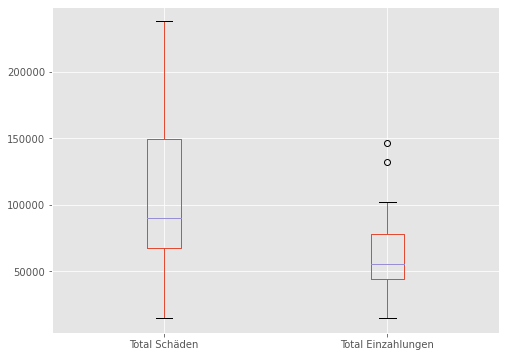

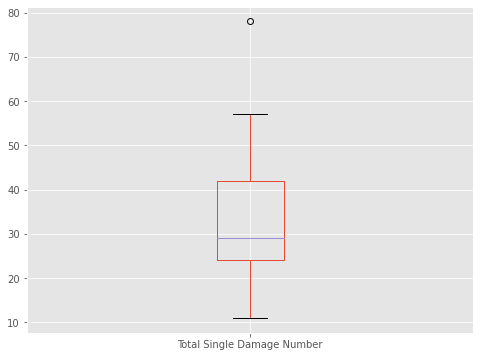

In [10]:
df[["Total Schäden", "Total Einzahlungen"]].plot.box(figsize=(8,6));
df[['Total Single Damage Number']].plot.box(figsize=(8,6));

## Preview visualizations

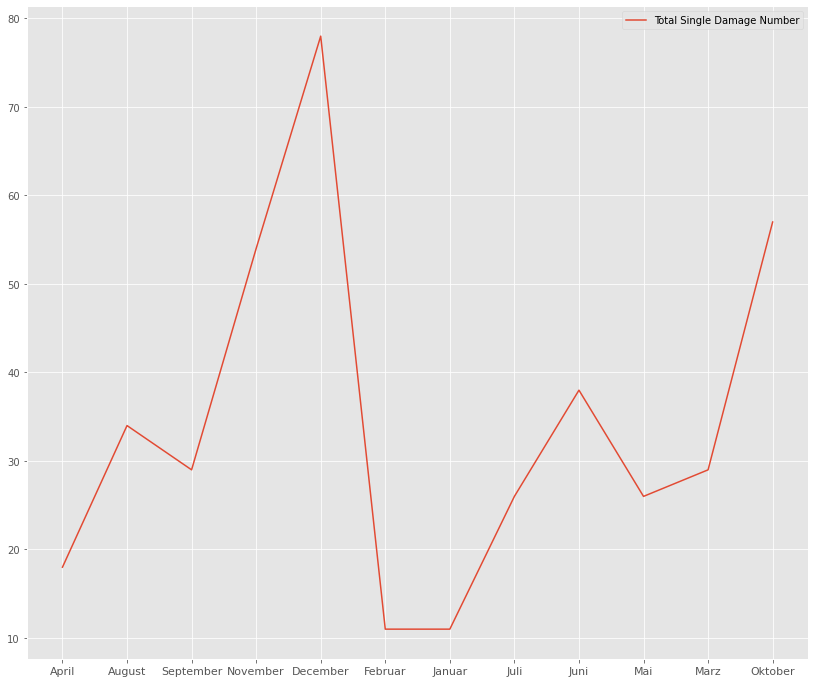

In [11]:
df[['Total Single Damage Number']].plot.line(figsize=(14,12));
plt.xticks(rotation=360, fontsize=11)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["April", "August" ,"September", "November", "December", "Februar","Januar", "Juli", "Juni", "Mai", "Marz", "Oktober"]);

In December there were the highest number of Damages

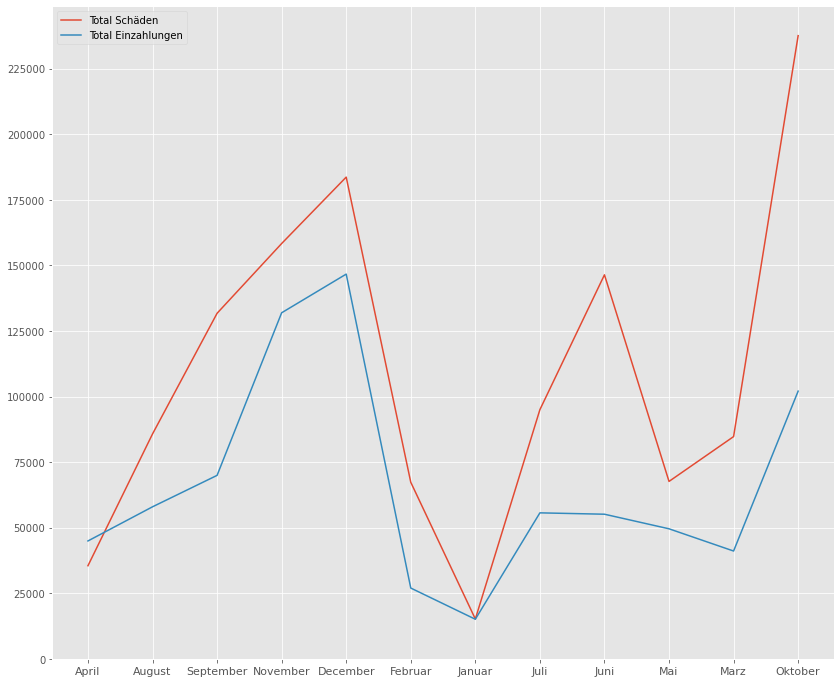

In [12]:
df[["Total Schäden", "Total Einzahlungen"]].plot.line(figsize=(14,12))
plt.yticks(range(0,250000,25000)); 
plt.xticks(rotation=360, fontsize=11)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["April", "August" ,"September", "November", "December", "Februar","Januar", "Juli", "Juni", "Mai", "Marz", "Oktober"]);


# Exploring Linear Relation between Total Single Damage Number and Total Schäden

The Simple Linear regression is a useful statistical method used to understand the relationship between two variables, x and y. However, before I conduct linear regression, I must first make sure that four assumptions are met:

1. Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y. It can be observed with a scatter plot.


2. Independence: The residuals are independent. In particular, there is no correlation between consecutive residuals in the data. It is checkeed with Durbin-Watson test.


3. Homoscedasticity: The residuals have constant variance at every level of x.I will check it with the Q-Qplot in the next section


4. Normality: The residuals of the model are normally distributed. I will check it with the Shapiro-Will Test. 

#### Linear Relationship

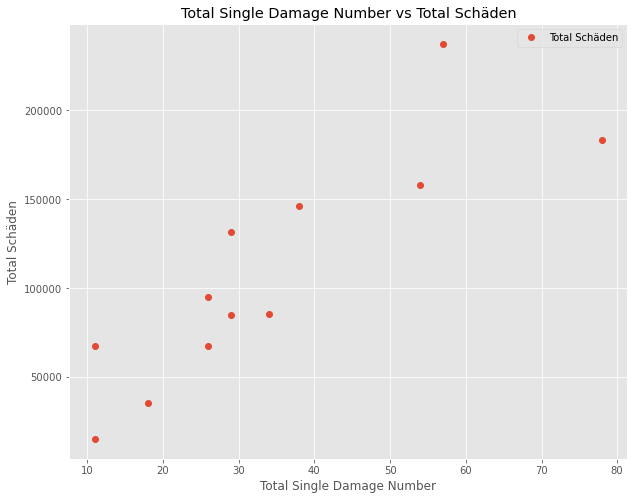

In [13]:
df.plot(x='Total Single Damage Number', y='Total Schäden', style='o', figsize=(10,8))
plt.title('Total Single Damage Number vs Total Schäden')  
plt.xlabel('Total Single Damage Number')  
plt.ylabel('Total Schäden')  
plt.show()

## How these two variables are distribuited?

<AxesSubplot:xlabel='Total Single Damage Number'>

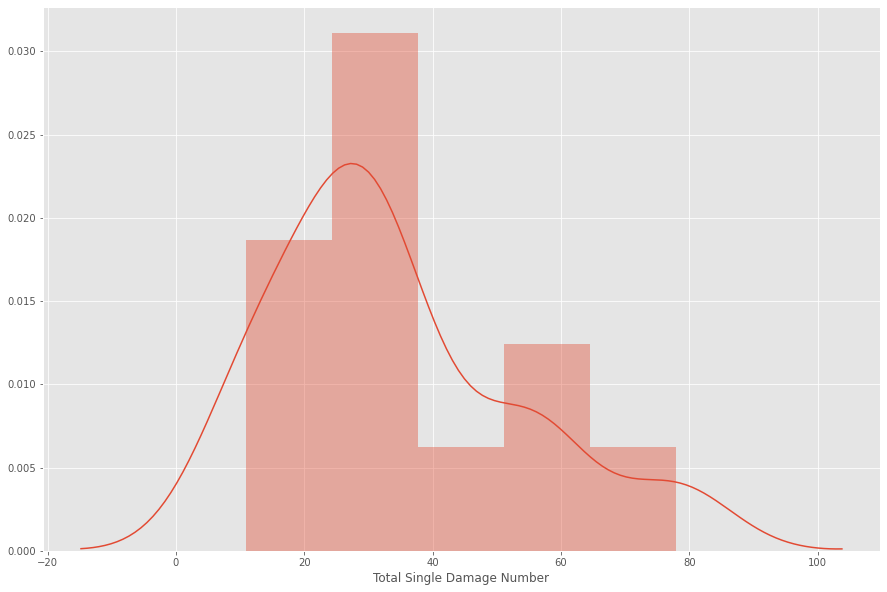

In [14]:
plt.figure(figsize=(15,10))
sb.distplot(df['Total Single Damage Number'])


In [15]:
import statistics
median = statistics.median(df["Total Single Damage Number"])
mean = statistics.mean(df["Total Single Damage Number"])
print(f"The median value is {median}")
print(f"The mean value is {mean}")

The median value is 29.0
The mean value is 34.25


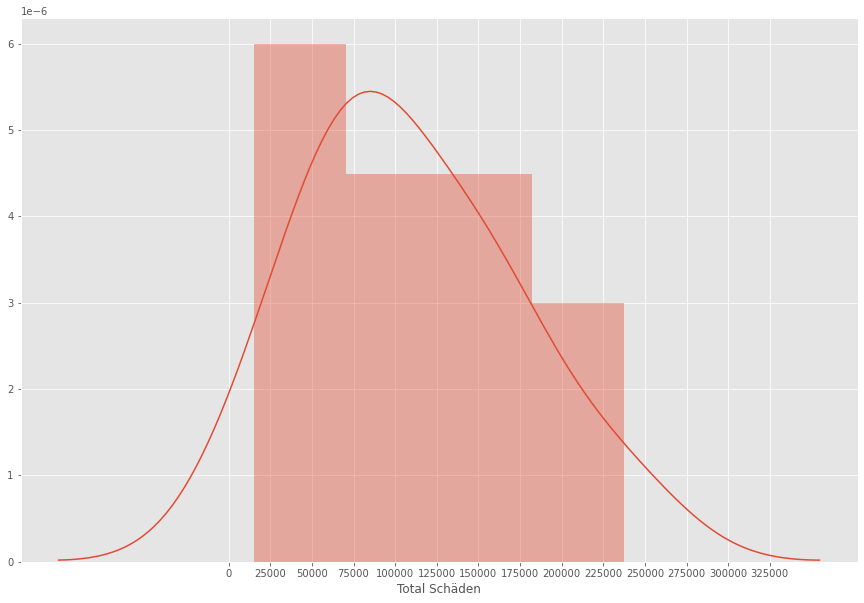

In [16]:
plt.figure(figsize=(15,10))
sb.distplot(df['Total Schäden'])
plt.xticks(range(0,350000,25000)); 

In [17]:
import statistics
median = statistics.median(df["Total Schäden"])
mean = statistics.mean(df["Total Schäden"])
print(f"The median value is {median}")
print(f"The mean value is {mean}")


The median value is 90350.28
The mean value is 109055.4725


## Normality test



Sample inferior to 50. I proceed to do the Shapiro-Wilk normality test

[Shapiro Wilk documentation](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)
[scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)


In [18]:
from scipy import stats
from scipy.stats import shapiro

In [19]:
y = df["Total Schäden"]
x= df["Total Single Damage Number"]
shapiro_testX = stats.shapiro(x)
shapiro_testY = stats.shapiro(y)
print(f"Total Single Damage Number:\n The Shapiro normality test is {np.round(shapiro_testX[0],2)} and its p-value is bigger than 0.05 ({np.round(shapiro_testX[1],4)})\n it means the null hypothesis should be retained: \n The Total Single Damage Number distribuition doesn't have differences wiht a normal distribuition \n")

print(f"Total Schäden:\n The Shapiro normality test is {np.round(shapiro_testY[0],2)} and its p-value is bigger than 0.05 ({np.round(shapiro_testY[1],4)})\n it means the null hypothesis should be retained:\n  The Total Schäden distribuition doesn't have differences wiht a normal distribuition.")


Total Single Damage Number:
 The Shapiro normality test is 0.91 and its p-value is bigger than 0.05 (0.2113)
 it means the null hypothesis should be retained: 
 The Total Single Damage Number distribuition doesn't have differences wiht a normal distribuition 

Total Schäden:
 The Shapiro normality test is 0.97 and its p-value is bigger than 0.05 (0.8654)
 it means the null hypothesis should be retained:
  The Total Schäden distribuition doesn't have differences wiht a normal distribuition.


## Some preview conclusions


At this point I can observe some facts:
              
              - The general performance of all companies in 2020. 
              
                 -It's notory that there were some profit values just in April.
                 - There were more losses in Oktober than the rest of the year.
                 - Meanwhile in Dezember there were more single damage number 
                 - The Total Single Damage Number and Total Schäden met normality 
                 assumption in order to do the simple linear regression
              





# Simple Linear Regression 

How much it changes the damage costs when a singular damage case occurs?

In order to predict this effect I'm going to use a Simple linear regression

[Simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression)

In [20]:
# y = df["Total Schäden"].values.reshape(-1,1)
y = df["Total Schäden"]
x1= df["Total Single Damage Number"].values.reshape(-1,1)

In [21]:
model=LinearRegression().fit(x1, y)

In [22]:
import statsmodels.api as sm
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\Elena Peña\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total Schäden   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     28.41
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           0.000333
Time:                        12:54:59   Log-Likelihood:                -141.28
No. Observations:                  12   AIC:                             286.6
Df Residuals:                      10   BIC:                             287.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.41e+04   2.04e+04      0.691      0.505   -3.13e+04    5.95e+04
x1          2772.4278    520.179      5.330      0.000    1613.398    3931.458
==============================================================================
Omnibus:                        0.950   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.746
Skew:                           0.523   Prob(JB):                        0.689
Kurtosis:                       2.368   Cond. No.                         80.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Total Single Damage Number p-value coefficient is less than 0.05, so It's not possible to reject the null hypothesis: the Damage cases number predict the Damages in Euros.

The Independence and the Homoscedasticity are met.

The Durbin-Watson test checked there is no serial correlation in the residuals.(Must be between 0-4) 

[Durbin-Watson test](https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html)

The Q-Q plot, short for quantile-quantile plot, is a type of plot that it is used to determine whether or not the residuals of a model follow a normal distribution. 
The points on the plot roughly form a straight diagonal line, then the normality assumption is met.
[QQplot Statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html)

The residual values are well distribuited p-value(0.75)is superior than 0.05.
 The normality assumption in the residual values is met


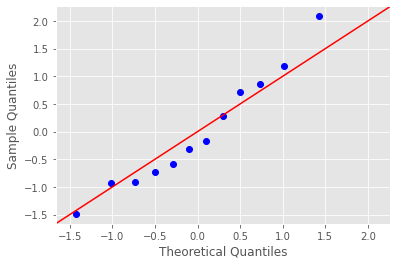

In [23]:
res = results.resid # residuals
fig = sm.qqplot(res, fit=True, line="45")
shapiro_res = stats.shapiro(res);shapiro_res 
print(f"The residual values are well distribuited p-value({np.round(shapiro_res[1], 2)})is superior than 0.05.\n The normality assumption in the residual values is met")
plt.show()

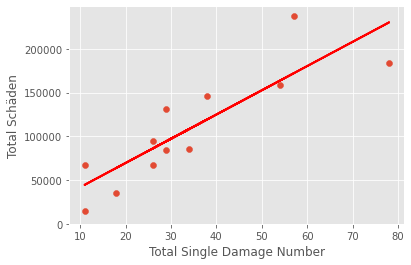

In [24]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat =2772.4278*x1 + 1.41e+04 
#Schadenhat= SDNcoefficient * SDNOriginalValues + SchadenConstant

# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=2, c='red', label ='regression line')
# Label the axes
plt.ylabel('Total Schäden')
plt.xlabel('Total Single Damage Number')
plt.yticks(range(0,250000,50000));
plt.show()

When it happens one unit increase in the number of Damage cases, the Damage price increases by average of 2772.43 units.

# Appendix

# Predictions

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
y = df["Total Schäden"].values.reshape(-1,1)
x= df["Total Single Damage Number"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0, shuffle=True)

In [26]:
# print(X_train)
# print(X_test)
# print(y_train)
print(y_test)

[[ 15169.89]
 [237573.26]
 [183647.93]]


In [27]:
# regressor = LinearRegression()  
# regressor.fit(X_train, y_train) #training the algorithm

regressor = LinearRegression()
regressor.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [28]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

print(regressor.score(X_train, y_train))

[17226.20241845]
[[2706.56138956]]
0.6608128924143306


In [29]:
def adj_r2(x,y):
    r2 = regressor.score(X_train, y_train)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

adj_r2(x,y)

0.6268941816557636

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,15169.89,46998.377704
1,237573.26,171500.201623
2,183647.93,228337.990804


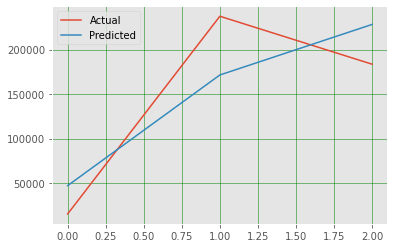

In [32]:
df.plot(kind='line',figsize=(6,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

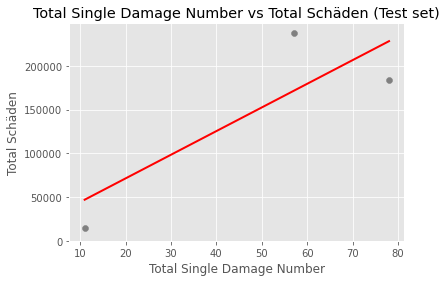

In [33]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Total Single Damage Number vs Total Schäden (Test set)')
plt.xlabel("Total Single Damage Number") # adding the name of x-axis
plt.ylabel("Total Schäden")
plt.yticks(range(0,250000,50000));
plt.show()

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred).round(2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred).round(2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2))


Mean Absolute Error: 47530.54
Mean Squared Error: 2458634402.47
Root Mean Squared Error: 49584.62


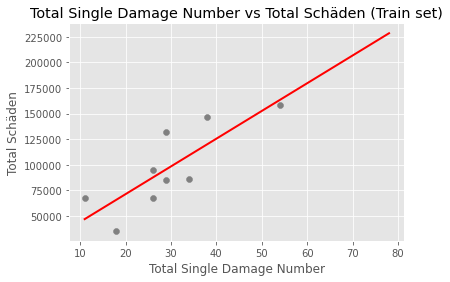

In [35]:
plt.scatter(X_train, y_train,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Total Single Damage Number vs Total Schäden (Train set)')
plt.xlabel("Total Single Damage Number") # adding the name of x-axis
plt.ylabel("Total Schäden")
plt.show()

# References


https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html

https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

https://realpython.com/linear-regression-in-python/

https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html